<a href="https://colab.research.google.com/github/bryan-curtis-hbap/pds/blob/main/HBAP_PDS_CS50_Week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

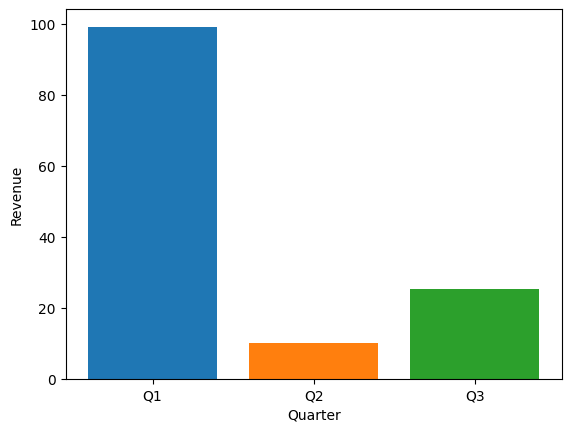

In [1]:
#import matplotlib #graphing
from matplotlib import pyplot
pyplot.bar('Q1', 99.1)
pyplot.bar('Q2', 10.0)
pyplot.bar('Q3', 25.4)
pyplot.xlabel('Quarter')
pyplot.ylabel('Revenue')
pyplot.show()


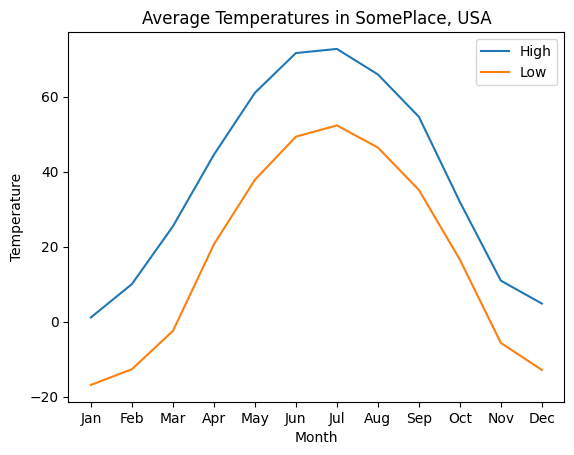

In [1]:
from matplotlib import pyplot #graphing
high_temps =  [1.1, 10.0, 25.4, 44.5, 61.0, 71.6, 72.7, 65.9, 54.6, 31.9, 10.9, 4.8]
low_temps = [-16.9, -12.7, -2.5, 20.6, 37.8, 49.3, 52.3, 46.4, 35.1, 16.5, -5.7, -12.9]
#pyplot.plot(high_temps, color='#5B91BD') #medium light blue
#pyplot.plot(low_temps, color='#E98E3E') #orange-ish yellow
pyplot.plot(high_temps) #medium light blue
pyplot.plot(low_temps) #orange-ish yellow
pyplot.title('Average Temperatures in SomePlace, USA', fontsize=12)
pyplot.xlabel('Month')
pyplot.ylabel('Temperature')
#pyplot.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
pyplot.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
pyplot.legend(['High', 'Low'])
pyplot.show()

In [4]:
#Monte Carlo example:
from random import *
def main():
	#n = int(input('How many pieces of chalk to throw? '))
  n = 50000
  hits = 0 #number of pieces of chalk that land in quarter-circle
  for i in range(n):
    x =  random()
    y = random()
    if x**2 + y**2 <= 1.0 :
      hits += 1
  estimate = hits / n * 4
  print ('PI is approximately = ', estimate)

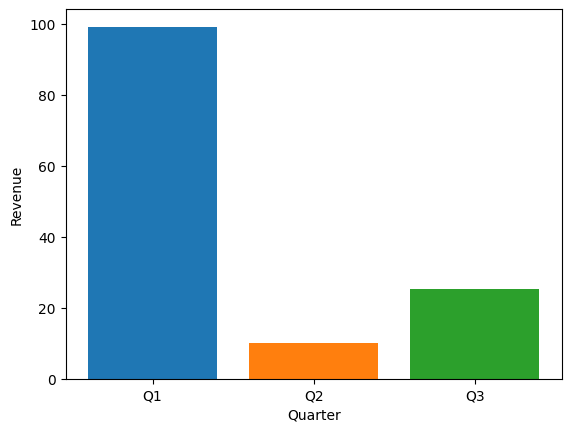

In [ ]:

#import matplotlib #graphing
from matplotlib import pyplot
pyplot.bar('Q1', 99.1)
pyplot.bar('Q2', 10.0)
pyplot.bar('Q3', 25.4)
pyplot.xlabel('Quarter')
pyplot.ylabel('Revenue')
pyplot.show()


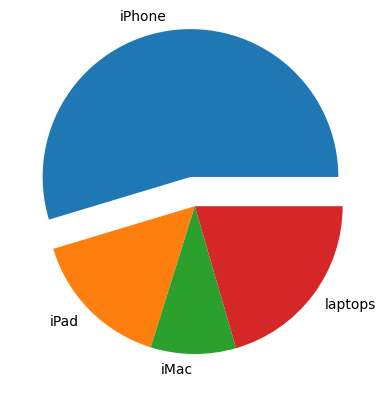

In [9]:
from matplotlib import pyplot #graphing
revenue = [88, 25, 15, 33]
mylabels = ['iPhone', 'iPad', 'iMac', 'laptops']
myexplode = [0.2, 0, 0, 0]
#pyplot.pie(revenue)
pyplot.pie(revenue, labels=mylabels, explode=myexplode)
pyplot.show()


In [ ]:
'''
Bryan Curtis | HBAP | 2025-02-11

####################################################################################################
Question 6
Retrieving Web Data and APIs
According to the documentation for Alpha Vantage’s TIME_SERIES_DAILY API, via what URL could you
    get a CSV file with the daily close prices of IBM’s stock since 2000?
Assume that your API key is “demo”, even though the URL won’t work with that key.

Sign up for a free API key for Alpha Vantage. Be sure to copy/paste it somewhere safe!

Then solve this problem:

Recall that Alpha Vantage offers a TIME_SERIES_DAILY API, which allows you to get a
    CSV file with the daily close prices of a stock from the past 20+ years.

Create a python file, named prices.py, in your text editor, to implement a program that

prompts the user for a stock symbol (via the command line) and
outputs, line by line, a date followed by the close price of that stock on that date.
If the user inputs MSFT, your output should resemble:

2019-04-22 $123.7600
2019-04-18 $123.3700
2019-04-17 $121.7700
...
1998-01-06 $131.1300
1998-01-05 $130.3800
1998-01-02 $131.1300
Your first line of output, though, should be for the date on which the market most recently closed.


Hint
Assuming your program has a variable called API_KEY, you can run (and thus test) your program by running it with a command like

API_KEY=YOURS python3 prices.py MSFT
but replace YOURS with your own API key.

####################################################################################################

'''


def main():
    import sys
    import csv
    import os  #required for os.getenv()
    import requests
    from dateutil import parser #parse the date string into a date

    #API_KEY = os.getenv("API_KEY")
    API_KEY = 'NPBIPUY4J17RK4DB'
    if not API_KEY:
	    sys.exit("Missing API_KEY")

    #API_KEY = 'demo' #override to see demo - be sure to also use stock_symbol IBM

    #Assumed compact but can be changed
    outputsize = 'compact' # compact,full

    #rowcounter = 0
    #Allow comand line argument for stock symbol to speed testing
    if len(sys.argv) != 2:
        #If we only allowed command line argument then this next line would be uncommented
        #sys.exit('Correct usage: python prices.py STOCK_SYMBOL')

        #Assignment specified 'prompt the user for a stock symbol (via the command line) so here we go
        symbol = input('Enter stock symbol (EXAMPLE: AAPL): ')
        if len(symbol) < 1:
            sys.exit("Stock symbol invalid. I/'m sorry you didn/'t want to play along. Goodbye.")
    else:
        symbol = sys.argv[1] #STOCK_SYMBOL

    #symbol = 'IBM' #override if using demo
    url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={API_KEY}&datatype=csv&outputsize={outputsize}'
    response = requests.get(url)

    if response:
        reader = csv.DictReader(response.text.splitlines())
        #API results are already sorted in descending order so no need to resort- trick question perhaps?
        # re: Your first line of output, though, should be for the date on which the market most recently closed.
        try:
            for row in reader:
                current_timestamp=parser.parse(row['timestamp'])
                print(f'{current_timestamp.strftime("%Y-%m-%d")} ${float(row["close"]):4.4f}')
                #rowcounter += 1
        except:
            print('Oops. Something went wrong! Ensure that you used a valid API_KEY and that you have not exceeded the 25 requests per day limit for non-premium accounts')
    else:
        print('An error has occurred.')

    #print ('Rows returned:',rowcounter)


main()

Oops. Something went wrong! Ensure that you used a valid API_KEY and that you have not exceeded the 25 requests per day limit for non-premium accounts


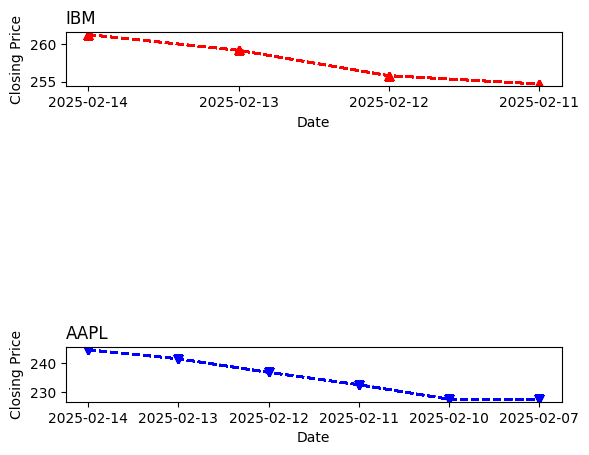

In [4]:
import sys
import csv
import os  #required for os.getenv()
import requests
from dateutil import parser #parse the date string into a date
from matplotlib import pyplot #graphing
#API_KEY = os.getenv("API_KEY")
API_KEY = 'NPBIPUY4J17RK4DB'
if not API_KEY:
  sys.exit("Missing API_KEY")

    #API_KEY = 'demo' #override to see demo - be sure to also use stock_symbol IBM

    #Assumed compact but can be changed
outputsize = 'compact' # compact,full

    #rowcounter = 0
    #Allow comand line argument for stock symbol to speed testing
#if len(sys.argv) != 2:
        #If we only allowed command line argument then this next line would be uncommented
        #sys.exit('Correct usage: python prices.py STOCK_SYMBOL')

        #Assignment specified 'prompt the user for a stock symbol (via the command line) so here we go
  #symbol = input('Enter stock symbol (EXAMPLE: AAPL): ')
#if len(symbol) < 1:
#  sys.exit("Stock symbol invalid. I/'m sorry you didn/'t want to play along. Goodbye.")
#else:
#  symbol = sys.argv[1] #STOCK_SYMBOL

def plot_stock(symbol, format, rows, cols, which, days):
    # How many roiws and columns for each subplot, which row of the 3 and how many days to display
    #symbol = 'IBM' #override if using demo
  url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={API_KEY}&datatype=csv&outputsize={outputsize}'
  response = requests.get(url)

  if response:
    reader = csv.DictReader(response.text.splitlines())
    prices=[]
    dates=[]
        #API results are already sorted in descending order so no need to resort- trick question perhaps?
        # re: Your first line of output, though, should be for the date on which the market most recently closed.
    try:
      for row in reader:
                #current_timestamp=parser.parse(row['timestamp'])
                #print(f'{current_timestamp.strftime("%Y-%m-%d")} ${float(row["close"]):4.4f}')
        prices.append(float(row["close"])) #MUST convert as results are all assumed text and plot needs numerical values
        dates.append(row['timestamp'])
                #rowcounter += 1
        pyplot.subplot(rows, cols, which)
        #plot all the days through the number of days passed in (-1) and same with prices
        pyplot.plot(dates[0:days], prices[0:days], format, label=symbol)
        pyplot.xlabel("Date")
        pyplot.ylabel("Closing Price")
        pyplot.title(symbol, loc='left')
        pyplot.subplots_adjust(hspace=1.9)

    except:
      print('Oops. Something went wrong! Ensure that you used a valid API_KEY and that you have not exceeded the 25 requests per day limit for non-premium accounts')
  else:
    print('An error has occurred.')

    #print ('Rows returned:',rowcounter)
plot_stock('IBM', "r--^", 3, 1, 1, 4)
plot_stock('FB', "g--o", 3,1,2,5)
plot_stock('AAPL', "b--v", 3,1,3,6)
pyplot.show()


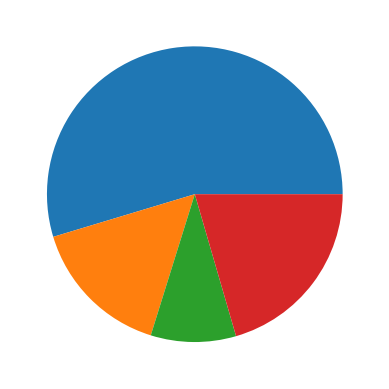

In [5]:
#import matplotlib #graphing
from matplotlib import pyplot
revenue = [88, 25, 15, 33]
pyplot.pie(revenue)
pyplot.show()